#**(1) Install and Load Packages**

In [ ]:
!pip install Pattern

In [ ]:
import numpy as np 
import pandas as pd
import re
from pattern.text.en import singularize
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords') #no need to run if already downloaded
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**(2) Load & Clean Data**

In [ ]:
data = pd.read_csv('Search Terms Tagging 2022 02 22.csv')

In [ ]:
print(data.shape)
data.head()

(10000, 3)


,searched_keywords,Total Visits,Unique Visits
0,coupa,2561,1665
1,uams,1385,881
2,iflex,1239,677
3,itq,867,540
4,1knowledge,837,407


In [ ]:
def americanize(string):
    url ="https://raw.githubusercontent.com/hyperreality/American-British-English-Translator/master/data/british_spellings.json"
    british_to_american_dict = requests.get(url).json()    

    for british_spelling, american_spelling in british_to_american_dict.items():
        string = string.replace(british_spelling, american_spelling)
  
    return string

In [ ]:
def clean_text(df_text_column, data):   
    corpus = []
    for i in range(0, len(data)):
        text = re.sub('&quot;', '',df_text_column[i]) #Remove this sepcific phrase
        text = re.sub('&#039;', '', text) #Remove this sepcific phrase
        text = re.sub('@dbs.com', '', text) #Remove this sepcific phrase
        text = re.sub('@1bank.dbs.com', '', text)
        text = re.sub('[^A-Za-z0-9]+', ' ', text) #Only numbers and text
        
        #Standardize Text
        text = text.lower()
        text = americanize(text) #Standardize to American English
        text = text.split() #Lemmatization start
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
        text = ' '.join(text) #Lemmatization end
        text = singularize(text) #Plural to singular
        corpus.append(text)
        print(i+1, 'of', len(data))
    return corpus

In [ ]:
data['clean_keywords'] = clean_text(data['searched_keywords'], data)
new_data = data.groupby(['clean_keywords'], as_index=False).sum()
new_data['Average visit per person'] = new_data['Total Visits'] / new_data['Unique Visits']
new_data['Char length'] = new_data['clean_keywords'].str.replace('\s', '', regex=True).str.len()
new_data = new_data[new_data['clean_keywords']!=''].reset_index(drop=True) #Remove blanks

Streaming output truncated to the last 5000 lines.
5001 of 10000
5002 of 10000
5003 of 10000
5004 of 10000
5005 of 10000
5006 of 10000
5007 of 10000
5008 of 10000
5009 of 10000
5010 of 10000
5011 of 10000
5012 of 10000
5013 of 10000
5014 of 10000
5015 of 10000
5016 of 10000
5017 of 10000
5018 of 10000
5019 of 10000
5020 of 10000
5021 of 10000
5022 of 10000
5023 of 10000
5024 of 10000
5025 of 10000
5026 of 10000
5027 of 10000
5028 of 10000
5029 of 10000
5030 of 10000
5031 of 10000
5032 of 10000
5033 of 10000
5034 of 10000
5035 of 10000
5036 of 10000
5037 of 10000
5038 of 10000
5039 of 10000
5040 of 10000
5041 of 10000
5042 of 10000
5043 of 10000
5044 of 10000
5045 of 10000
5046 of 10000
5047 of 10000
5048 of 10000
5049 of 10000
5050 of 10000
5051 of 10000
5052 of 10000
5053 of 10000
5054 of 10000
5055 of 10000
5056 of 10000
5057 of 10000
5058 of 10000
5059 of 10000
5060 of 10000
5061 of 10000
5062 of 10000
5063 of 10000
5064 of 10000
5065 of 10000
5066 of 10000
5067 of 10000
5068 of 100

In [ ]:
print(new_data.shape)
new_data.head()

(7395, 5)


,clean_keywords,Total Visits,Unique Visits,Average visit per person,Char length
0,000004 ibg1 shipping aviation amp tpt,19,2,9.5,32
1,007 275m,10,4,2.5,7
2,01lreg1 treasuresleveraging,31,2,15.5,26
3,06496g,20,4,5.0,6
4,1 2 wow,12,5,2.4,5


In [ ]:
new_data.to_csv('new_data.csv',index=False)

#**(3) EDA**

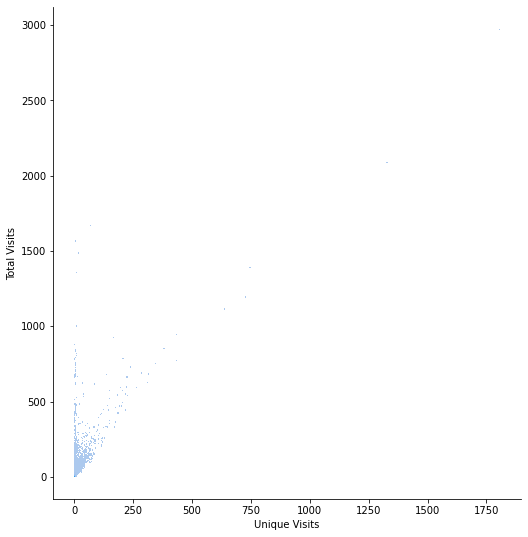

In [ ]:
sns.displot(data=new_data, x="Unique Visits", y="Total Visits").fig.set_size_inches(8,8)

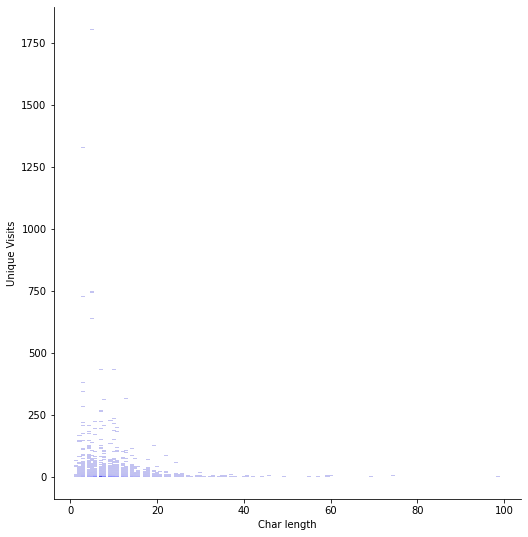

In [ ]:
sns.displot(data=new_data, x="Char length", y="Unique Visits", color='blue').fig.set_size_inches(8,8)

(-50.0, 100.0)

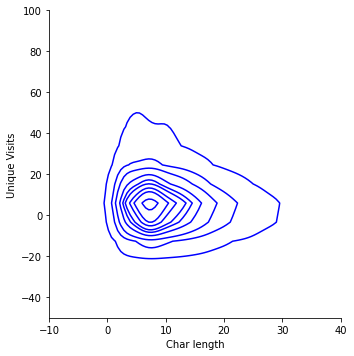

In [ ]:
#kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram
sns.displot(data=new_data, x="Char length", y="Unique Visits", kind="kde", color='blue')
plt.xlim(-10, 40)
plt.ylim(-50, 100)

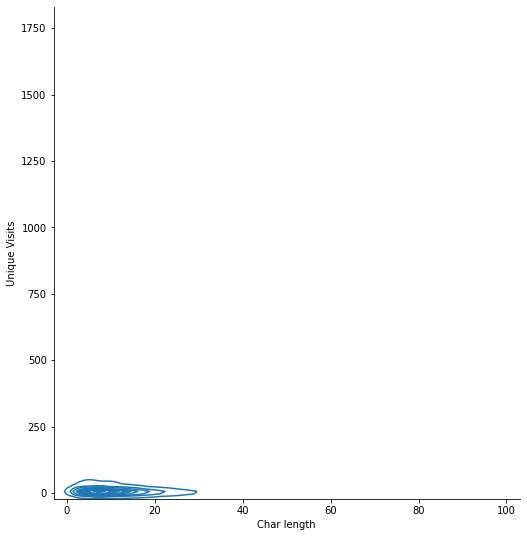

In [ ]:
sns.displot(data=new_data, x="Char length", y="Unique Visits", kind="kde").fig.set_size_inches(8,8)


Some points we can observe from the **Char length vs Unique Visits** EDA:
*   Data with high character length tend to have fewer unique visits - rare search terms not frequented
*   Data is concentrated around those with character length <= 30


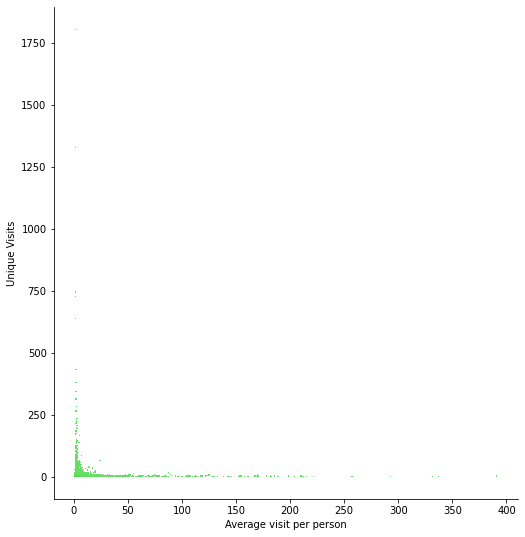

In [ ]:
sns.displot(data=new_data, y="Unique Visits", x="Average visit per person", color='green').fig.set_size_inches(8,8)

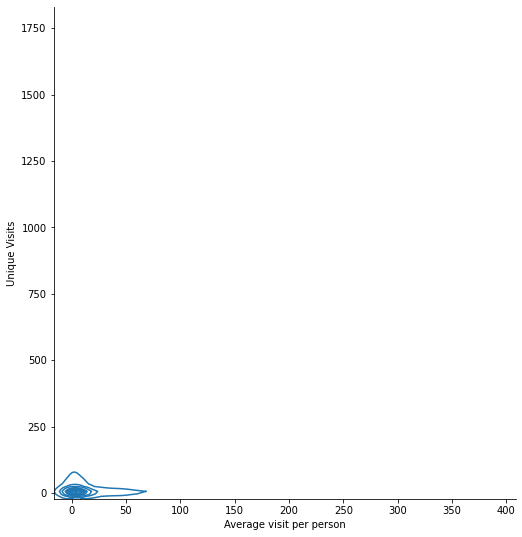

In [ ]:
sns.displot(data=new_data, y="Unique Visits", x="Average visit per person", kind="kde").fig.set_size_inches(8,8)

Some points we can observe from the **'Unique Visits' vs 'Average Visit'** EDA:
*   Higher average visits tend to have fewer unique visits. This implies a handful of individuals who do multiple searches on the same keywords (i.e less than 10 unique visits but more than 100 searches per unique visit). If we explore directly into the data, these searches tend to be searching for individual names/id numbers/email address etc. 
*   Those with low average visits (< 10) can be further segmented into 2 groups: (1) Low unique visits - implies not many people search for these terms or mispelled searchwords, and (2) High unique visits - These are the search words that we are interested in as they are highly frequented

#**(4) Topic Modelling**

In [ ]:
def further_cleaning(df_text_column, data):   
    corpus = []
    for i in range(0, len(data)):
        text = re.sub('[^a-zA-Z]+', ' ',df_text_column[i]) #Only text
        text = text.split()
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
        text = ' '.join(text)
        text = americanize(text) #Standardize to American 
        text = singularize(text) #Plural to singular
        corpus.append(text)
    return corpus

In [ ]:
new_data['clean_keywords'] = further_cleaning(new_data['clean_keywords'], new_data)
new_data = new_data.groupby(['clean_keywords'], as_index=False).sum()
new_data = new_data[new_data['clean_keywords']!=''].reset_index(drop=True) #Remove blanks

In [ ]:
'''
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(new_data['clean_keywords'])
'''

"\nfrom sklearn.feature_extraction.text import CountVectorizer\ncv = CountVectorizer()\ndtm = cv.fit_transform(new_data['clean_keywords'])\n"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(new_data['clean_keywords'])

In [ ]:
#If employing GridSearch
'''
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

search_params = {'n_components': [2,3,4,5,6,7,8,9,10]}
LDA = LatentDirichletAllocation(random_state=1)
model = GridSearchCV(LDA, param_grid=search_params)
model.fit(dtm)
model.best_estimator_
'''

"\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.decomposition import LatentDirichletAllocation\n\nsearch_params = {'n_components': [2,3,4,5,6,7,8,9,10]}\nLDA = LatentDirichletAllocation(random_state=1)\nmodel = GridSearchCV(LDA, param_grid=search_params)\nmodel.fit(dtm)\nmodel.best_estimator_\n"

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=123)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=123)

In [ ]:
n_components=5 #5 Topics
topic_df = pd.DataFrame(columns=["Topic " + str(i+1) for i in range(n_components)])

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index+1}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    topic_df["Topic " + str(index+1)] = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]]
    print(index)
    print('\n')

THE TOP 20 WORDS FOR TOPIC #1
['paynow', 'compliance', 'standard', 'doa', 'risk', 'rating', 'plan', 'control', 'manual', 'ibg', 'management', 'review', 'performance', 'change', 'customer', 'form', 'product', 'employee', 'group', 'credit']
0


THE TOP 20 WORDS FOR TOPIC #2
['trust', 'car', 'rate', 'tree', 'work', 'contract', 'management', 'central', 'signature', 'ideal', 'account', 'claim', 'internal', 'application', 'form', 'system', 'treasure', 'wealth', 'bank', 'ibg']
1


THE TOP 20 WORDS FOR TOPIC #3
['code', 'holiday', 'form', 'external', 'cheque', 'working', 'raffle', 'financial', 'financing', 'job', 'declaration', 'promotion', 'personal', 'email', 'travel', 'investment', 'letter', 'guide', 'staff', 'policy']
2


THE TOP 20 WORDS FOR TOPIC #4
['hub', 'hotel', 'hk', 'covid', 'country', 'digital', 'self', 'business', 'management', 'salary', 'cbg', 'iflex', 'account', 'risk', 'amp', 'office', 'banking', 'corporate', 'leave', 'service']
3


THE TOP 20 WORDS FOR TOPIC #5
['room', 'acce

In [ ]:
topic_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,paynow,trust,code,hub,room
1,compliance,car,holiday,hotel,acce
2,standard,rate,form,hk,data
3,doa,tree,external,covid,payment
4,risk,work,cheque,country,db
5,rating,contract,working,digital,request
6,plan,management,raffle,self,blackberry
7,control,central,financial,business,hr
8,manual,signature,financing,management,form
9,ibg,ideal,job,salary,security


# **(5) Word Clustering**

In [ ]:
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer 
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

**Word Vectorizer on text**

In [ ]:
sentences = [text.split() for text in new_data['clean_keywords']] #Convert to list format for word embedding

In [ ]:
model = Word2Vec(sentences, min_count=1)

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
len(X) #List of Numeric Vectors

7046

In [ ]:
X_df = pd.DataFrame(X)

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 30)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_df)
    kmeanModel.fit(X_df)
 
    distortions.append(sum(np.min(cdist(X_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
#find optimal k-clusters
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.024972345046763274
2 : 0.024845880192043944
3 : 0.024759608662876083
4 : 0.02468829116263313
5 : 0.02462360118273333
6 : 0.024569533889468264
7 : 0.02452149762482341
8 : 0.024475943404353075
9 : 0.02443153689667595
10 : 0.02440528902119148
11 : 0.024354364507480294
12 : 0.024339175788376317
13 : 0.02432182497340351
14 : 0.02426836471141146
15 : 0.0242542459590467
16 : 0.024241277540680492
17 : 0.024228166417934183
18 : 0.02416478008878262
19 : 0.02415379970025868
20 : 0.024106499485314008
21 : 0.024090987910231353
22 : 0.02405075354231973
23 : 0.023998706059975703
24 : 0.023980976869770642
25 : 0.02397187625626726
26 : 0.023979840851851793
27 : 0.02397735549122454
28 : 0.023923327507211056
29 : 0.023915832397177827


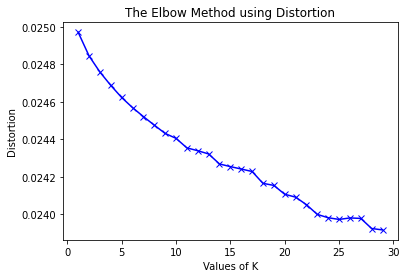

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
num_clusters = 5

In [ ]:
kmeanModel = KMeans(n_clusters=num_clusters).fit(X_df)
y_model = kmeanModel.fit_predict(X_df)

In [ ]:
new_data['y_kmeans'] = y_model
#new_data.to_csv('new_data.csv',index=False)

In [ ]:
df = pd.DataFrame(columns=["Cluster " + str(i+1) for i in range(num_clusters)])
#Top 20 keywords per cluster
for i in range(num_clusters):
  df["Cluster " + str(i+1)] = new_data[new_data['y_kmeans']==i].sort_values(by=['Unique Visits'], ascending=False).reset_index()['clean_keywords'][0:20]

In [ ]:
df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,itq,iflex,uam,coupa,pride
1,b,client connect,beeline,pip,knowledge
2,red,payslip,iwf,pitstop,iservice
3,cyberfit,blackberry,resignation,hr circular,art
4,onestop,aim,iserve,ddom,people hub
5,wetq,doa,cybersecure,deal,ichamp
6,ishare,cresa,block leave,hr,ibg
7,spacebook,mbfc,fc,cybrfit,pride value
8,pc code,form,leave,holiday,cmcp
9,early release,art declaration,tmrac,business application,grc


**Using Features instead of text**

In [ ]:
kmeanModel1 = KMeans(n_clusters=num_clusters).fit(new_data.iloc[:,1:5])
y_model1 = kmeanModel.fit_predict(X_df)

In [ ]:
new_data['y_kmeans1'] = y_model1
#new_data.to_csv('new_data.csv',index=False)

In [ ]:
df1 = pd.DataFrame(columns=["cluster_" + str(i) for i in range(num_clusters)])
#Top 20 keywords per cluster
for i in range(num_clusters):
  df1["cluster_" + str(i)] = new_data[new_data['y_kmeans1']==i].sort_values(by=['Unique Visits'], ascending=False).reset_index()['clean_keywords'][0:20]

In [ ]:
df1

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,itq,coupa,uam,knowledge,pride
1,beeline,iflex,people hub,pip,payslip
2,red,b,ichamp,iservice,pitstop
3,client connect,aim,cyberfit,art,ibg
4,blackberry,iwf,ddom,hr circular,ew
5,iserve,cybersecure,pride value,resignation,pc code
6,deal,doa,mbfc,onestop,covid
7,wetq,cybrfit,form,ishare,circular
8,fc,grc,wio,hr,webex
9,cresa,finacle,early release,block leave,cfd
